<a href="https://colab.research.google.com/github/MohamedAteya/Digits-Recognition/blob/master/Digit_Recognizer_Kaggel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Load Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


train data shape: (42000, 785) 
test data shape: (28000, 784)


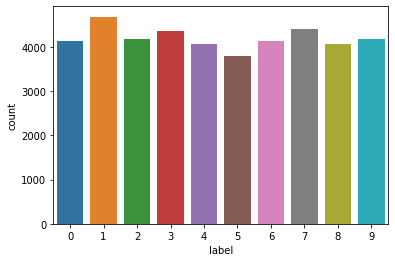

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/digits-recognition-kaggel/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/digits-recognition-kaggel/test.csv')
print(f'train data shape: {train.shape} \ntest data shape: {test.shape}')

y_train = train['label']
X_train = train.drop('label', axis =1)
X_test = test

#interpret labels
sns.countplot(y_train)
plt.show()
print(y_train.value_counts())

#Data splitting and preparing 

In [0]:
#Normalization 
X_train = X_train/255.
X_test = X_test/255.

#reshape
X_train = X_train.to_numpy().reshape(-1,28,28,1)
X_test = X_test.to_numpy().reshape(-1,28,28,1)

#label encoding 
y_train = pd.get_dummies(y_train)

#Data splitting
X_train , X_val , y_train , y_val = train_test_split(X_train,y_train,test_size =0.1,random_state  = 2)

In [0]:
print(f'X_train shape = {X_train.shape}\nX_val shape= {X_val.shape}')

X_train shape = (37800, 28, 28, 1)
X_val shape= (4200, 28, 28, 1)


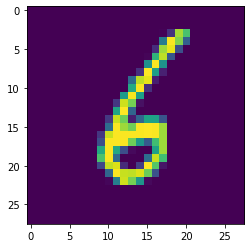

In [0]:
#show example
plt.imshow(X_train[15,:,:,0])

#Data Augmentation

In [0]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        ) 

###Callback class to stop training at ACCURACY THRESHOLD

In [0]:
ACCURACY_THRESHOLD = 0.995
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):   
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
          self.model.stop_training = True
callbacks = myCallback()

#CNN Model

In [2]:
model = tf.keras.models.Sequential([layers.Conv2D(filters = 16, kernel_size=(3,3),padding = 'same', input_shape = (28,28,1),activation = 'relu'),
                                    layers.Conv2D(filters = 16, kernel_size=(3,3),padding = 'same',activation = 'relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Dropout(0.25),

                                    layers.Conv2D(filters = 32, kernel_size=(3,3),padding = 'same',activation = 'relu'),
                                    layers.Conv2D(filters = 32, kernel_size=(3,3),padding = 'same',activation = 'relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Dropout(0.25),

                                    layers.Conv2D(filters = 64, kernel_size=(3,3),padding = 'same',activation = 'relu'),
                                    layers.Conv2D(filters = 64, kernel_size=(3,3),padding = 'same',activation = 'relu'),
                                    layers.MaxPooling2D(2,2),
                                    layers.Dropout(0.25),

                                    layers.Flatten(),
                                    layers.Dense(units = 256, activation = 'relu'),
                                    layers.Dropout(0.5),
                                    layers.Dense(units = 10, activation = 'softmax')


                                    ])

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0

#Fitting the Data 


In [0]:
train_gen = datagen.flow(x = X_train,y=y_train,batch_size=256)
history = model.fit_generator(train_gen,
                              epochs = 50,validation_data = (X_val,y_val) ,steps_per_epoch = 750,
                              callbacks=[callbacks])

Epoch 1/50
750/750 [==============================] - 43s 58ms/step - loss: 0.3071 - accuracy: 0.9004 - val_loss: 0.0398 - val_accuracy: 0.9860
Epoch 2/50
750/750 [==============================] - 44s 59ms/step - loss: 0.0797 - accuracy: 0.9765 - val_loss: 0.0205 - val_accuracy: 0.9940
Epoch 3/50
750/750 [==============================] - 44s 59ms/step - loss: 0.0582 - accuracy: 0.9826 - val_loss: 0.0196 - val_accuracy: 0.9936
Epoch 4/50
750/750 [==============================] - 44s 59ms/step - loss: 0.0491 - accuracy: 0.9855 - val_loss: 0.0172 - val_accuracy: 0.9943
Epoch 5/50
750/750 [==============================] - 47s 63ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0205 - val_accuracy: 0.9952
Epoch 6/50
750/750 [==============================] - 46s 62ms/step - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.0173 - val_accuracy: 0.9955
Epoch 7/50
750/750 [==============================] - 51s 68ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0126 - val_accuracy:

## Plotting Acuracy and Loss of Training and validation 

<Figure size 432x288 with 0 Axes>

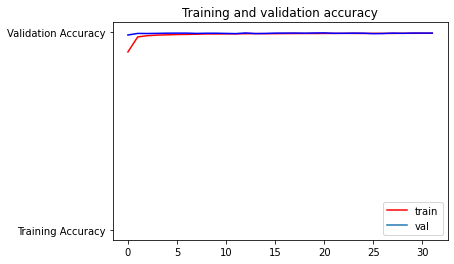

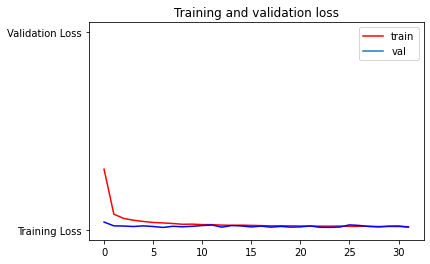

<Figure size 432x288 with 0 Axes>

In [0]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(['train','val'])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.legend(['train','val'])
plt.title('Training and validation loss')
plt.figure()



Save the weights

In [0]:
model.save_weights('my_model_weights.h5')

predict the results for kaggel submission

In [0]:
results = model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)


In [0]:
#download the file of submission to local
from google.colab import files

files.download('cnn_mnist_datagen.csv')
files.download('my_model_weights.h5')